# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# Reading the Data

In [2]:
df=pd.read_csv('College.csv')

In [3]:
df.head()

Unnamed: 0 Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University     Yes  1660    1232     721         23   
1            Adelphi University     Yes  2186    1924     512         16   
2                Adrian College     Yes  1428    1097     336         22   
3           Agnes Scott College     Yes   417     349     137         60   
4     Alaska Pacific University     Yes   193     146      55         16   

   Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  \
0         52         2885          537      7440        3300    450      2200   
1         29         2683         1227     12280        6450    750      1500   
2         50         1036           99     11250        3750    400      1165   
3         89          510           63     12960        5450    450       875   
4         44          249          869      7560        4120    800      1500   

   PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0   70        78       18.1           12    7041         60  
1   29        30       12.2           16   10527         56  
2   53        66       12.9           30    8735         54  
3   92        97        7.7           37   19016         59  
4   76        72       11.9            2   10922         15

# Exploratory Data Analysis

In [5]:
df=df.drop('Unnamed: 0',axis=1)

In [6]:
df.Private=df.Private.map({'Yes':1,'No':0})

In [7]:
df.head()

Private  Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  \
0        1  1660    1232     721         23         52         2885   
1        1  2186    1924     512         16         29         2683   
2        1  1428    1097     336         22         50         1036   
3        1   417     349     137         60         89          510   
4        1   193     146      55         16         44          249   

   P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  Terminal  \
0          537      7440        3300    450      2200   70        78   
1         1227     12280        6450    750      1500   29        30   
2           99     11250        3750    400      1165   53        66   
3           63     12960        5450    450       875   92        97   
4          869      7560        4120    800      1500   76        72   

   S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0       18.1           12    7041         60  
1       12.2           16   10527         56  
2       12.9           30    8735         54  
3        7.7           37   19016         59  
4       11.9            2   10922         15

In [8]:
cols=df.columns
a=df[cols].skew().sort_values()
a

Private       -1.021933
Terminal      -0.816542
PhD           -0.768170
Grad.Rate     -0.113777
Top25perc      0.259340
Room.Board     0.477356
Outstate       0.509278
perc.alumni    0.606891
S.F.Ratio      0.667435
Top10perc      1.413217
Personal       1.742497
F.Undergrad    2.610458
Enroll         2.690465
Accept         3.417727
Expend         3.459322
Books          3.485025
Apps           3.723750
P.Undergrad    5.692353
dtype: float64

In [10]:
a=a[a>0.75]
b=a.index
b

Index(['Top10perc', 'Personal', 'F.Undergrad', 'Enroll', 'Accept', 'Expend',
       'Books', 'Apps', 'P.Undergrad'],
      dtype='object')

In [11]:
df[b]=np.sqrt(df[b])

In [12]:
df.skew().sort_values()

Private       -1.021933
Terminal      -0.816542
PhD           -0.768170
Grad.Rate     -0.113777
Top25perc      0.259340
Room.Board     0.477356
Outstate       0.509278
Top10perc      0.539292
perc.alumni    0.606891
Personal       0.665133
S.F.Ratio      0.667435
Books          1.367549
Apps           1.440311
Enroll         1.472101
Accept         1.477958
F.Undergrad    1.531240
P.Undergrad    1.742177
Expend         1.927305
dtype: float64

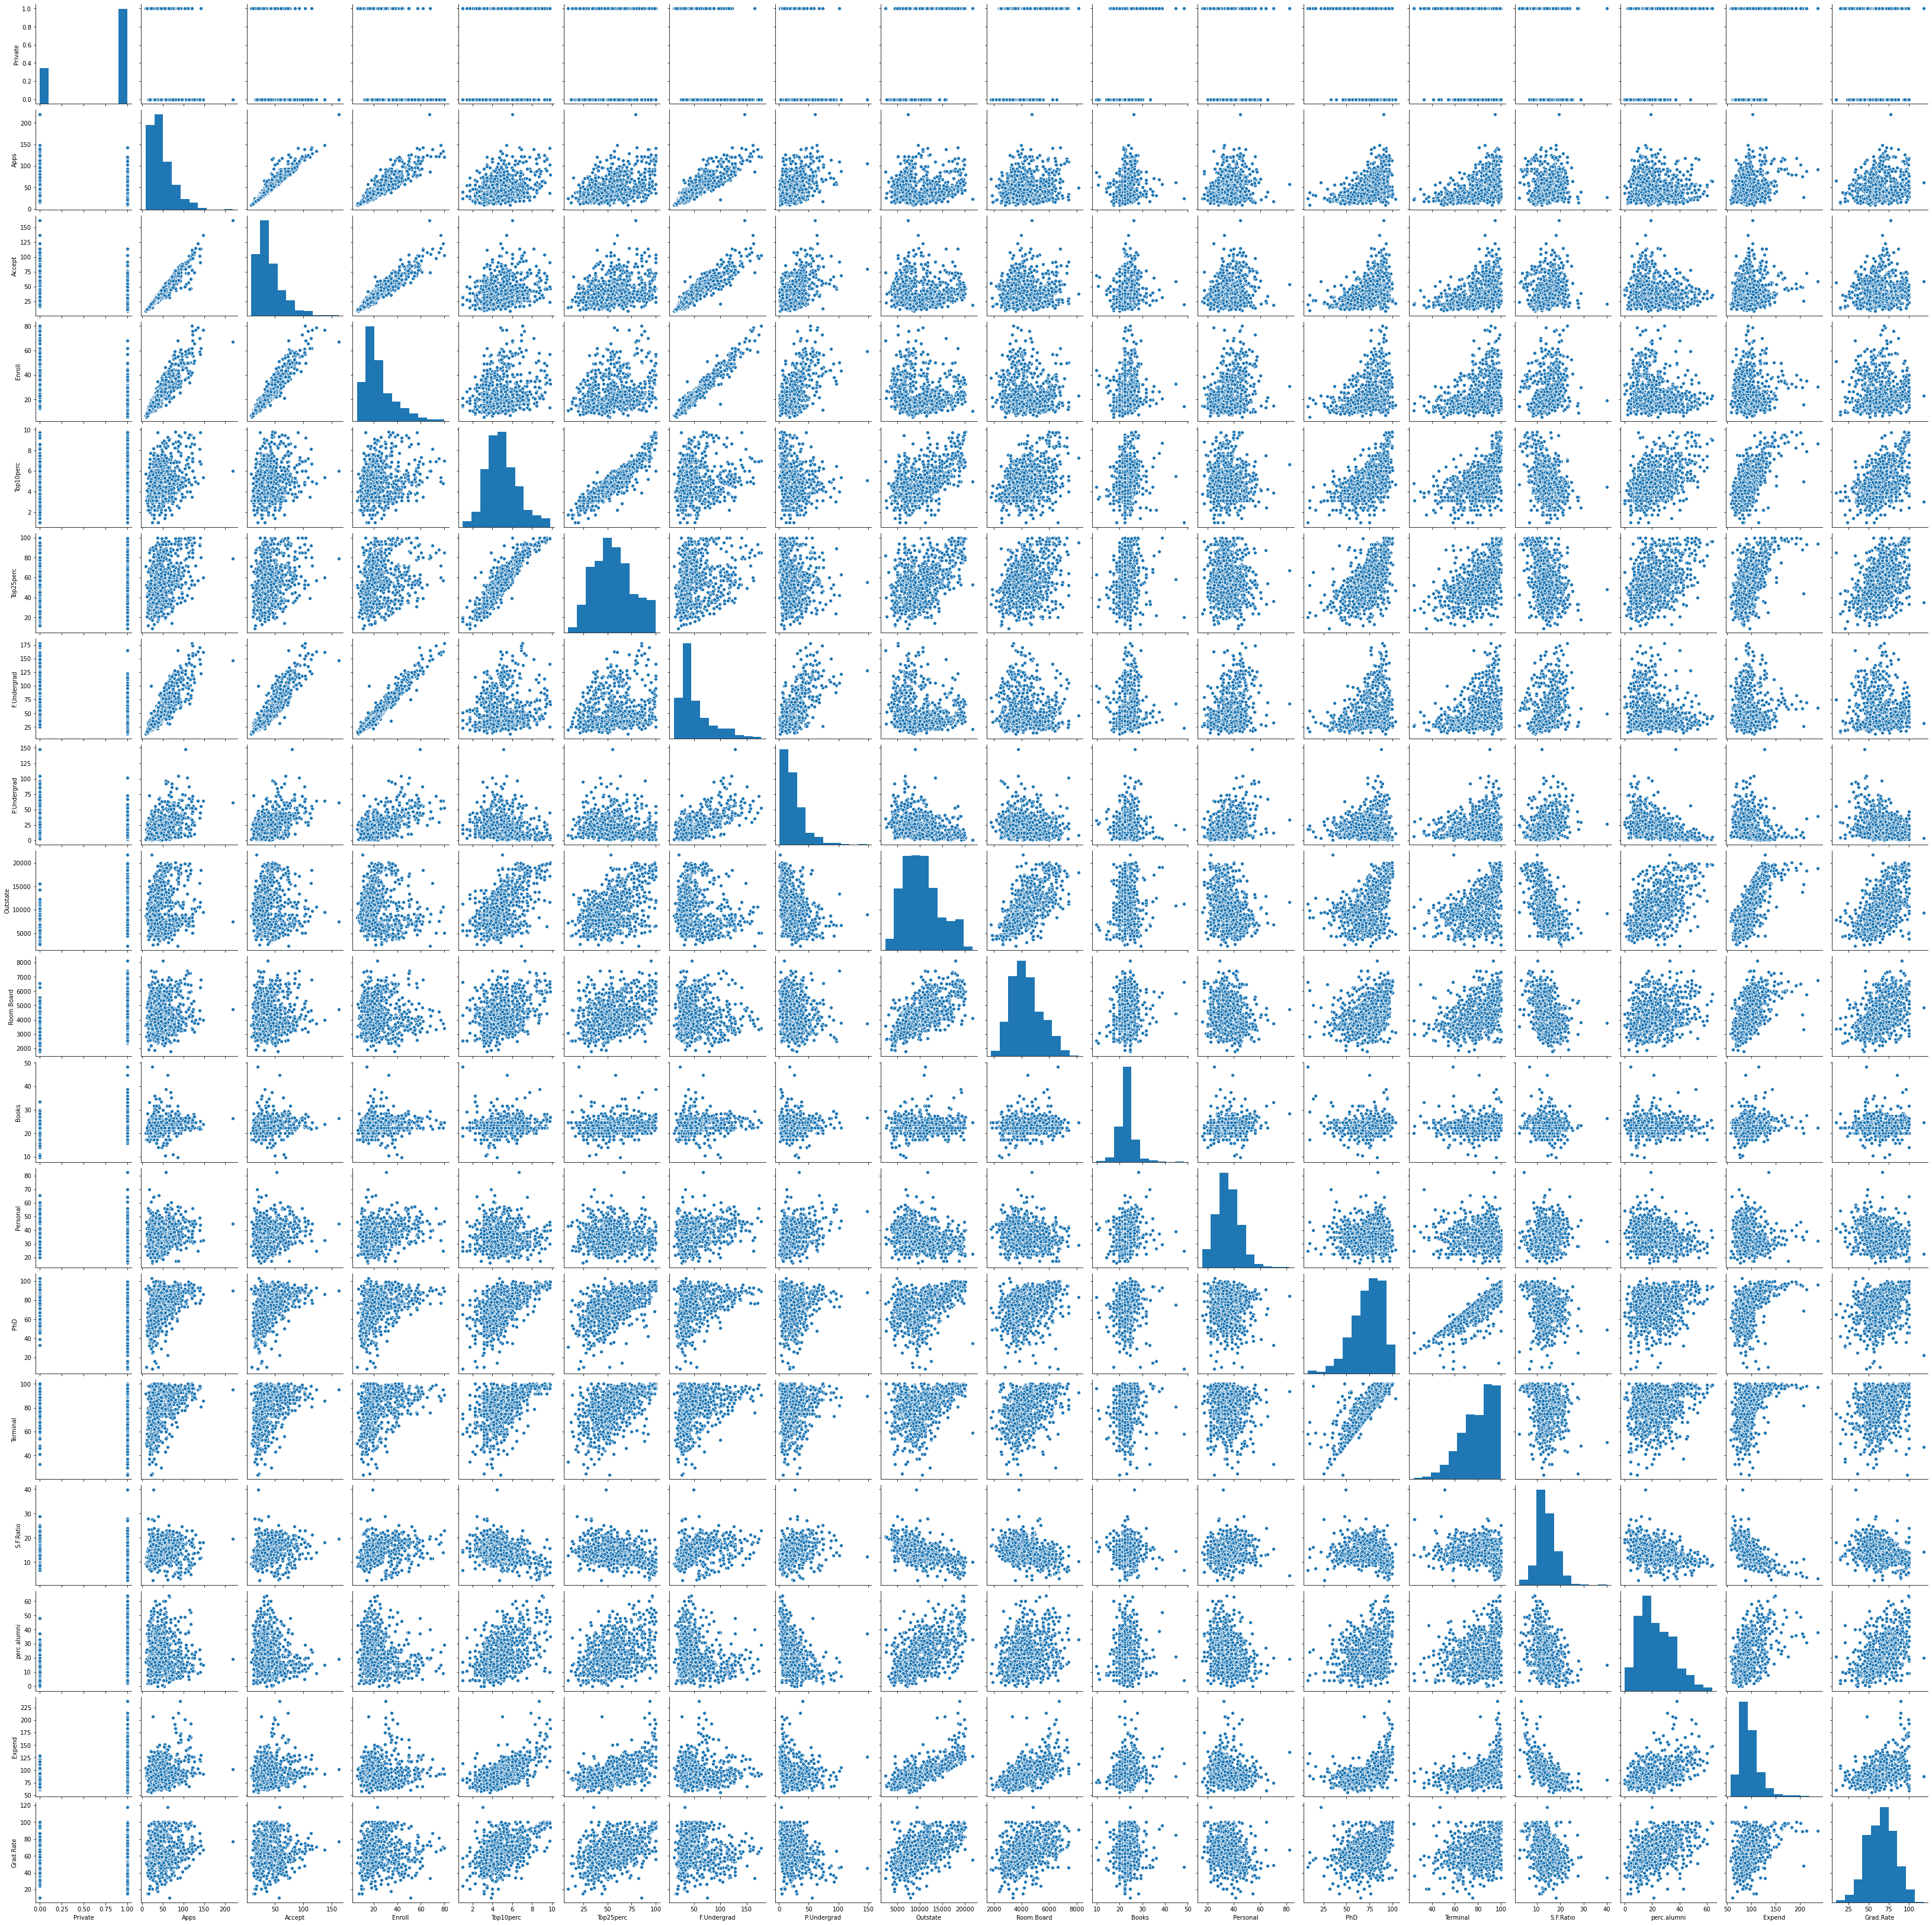

In [14]:
sns.pairplot(df)

# Training with SVM

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [16]:
target=df.Private
df=df.drop('Private',axis=1)

In [17]:
X_train,X_test,Y_train,Y_test=train_test_split(df,target,test_size=0.2)

In [18]:
steps=[('sc',StandardScaler()),('svc',SVC())]

In [19]:
pipeline=Pipeline(steps)

In [20]:
parameters={'svc__C':np.logspace(0,4,20)}

In [21]:
cv=GridSearchCV(pipeline,parameters,cv=5)

In [22]:
cv.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('sc',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('svc',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.001,...

In [23]:
cv_pred=cv.predict(X_test)

In [24]:
accuracy_score(cv_pred,Y_test)

0.9294871794871795

In [26]:
cv.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__memory': None,
 'estimator__steps': [('sc',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('svc',
   SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
       decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
       max_iter=-1, probability=False, random_state=None, shrinking=True,
       tol=0.001, verbose=False))],
 'estimator__verbose': False,
 'estimator__sc': StandardScaler(copy=True, with_mean=True, with_std=True),
 'estimator__svc': SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False),
 'estimator__sc__copy': True,
 'estimator__sc__with_mean': True,
 'estimator__sc__with_std': True,
 'estimator__svc__C': 1.0,
 'estimator__svc__break_ties': False,
 'estimator__svc__cache_size': 2

In [31]:
cv.best_score_

0.9437032258064516

In [32]:
cv.best_params_

{'svc__C': 2.636650898730358}

# Training with Decision Trees

In [48]:
X_train,X_test,Y_train,Y_test=train_test_split(df,target,test_size=0.2)

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


In [50]:
steps=[('dt',DecisionTreeClassifier())]
pipeline=Pipeline(steps)

In [51]:
parameters={'dt__max_depth':[1,2,3,4,5,6,7]}

In [54]:
cv=GridSearchCV(pipeline,parameters,cv=5)

In [55]:
cv.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('dt',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features=None,
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                                               min_samples_leaf=1,
                                                               min_samples_split=2,
                                          

In [56]:
cv_pred=cv.predict(X_test)

In [57]:
accuracy_score(cv_pred,Y_test)

0.9358974358974359

In [58]:
cv.best_params_

{'dt__max_depth': 3}

In [59]:
cv.best_score_

0.9242709677419354